In [124]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [438]:
vueltas = pd.read_csv("../dataset_todos_pilotos/vueltas_spain_final.csv")

vueltas.drop(['Piloto'], axis = 1, inplace = True)

In [439]:
vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

In [440]:
#vueltas_test = vueltas_test[vueltas_test['Piloto'] == "hamilton"]

In [441]:
vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_test = vueltas_test.drop(['anyo'], axis=1)
#vueltas_train.drop(['Piloto'], axis = 1, inplace = True)
#vueltas_test.drop(['Piloto'], axis = 1, inplace = True)

In [442]:
vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [443]:
vueltas_test.shape

(1074, 20)

In [444]:
scaler = MinMaxScaler()
scaler.fit(vueltas_train)
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)


In [445]:
vueltas_test

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
4077,87.509,2.0,5.0,0.0,1.0,1.0,0.0,36.7,0.0,7.0,49.4,2.0,87.627,87.831,2.0,13.0,0.0,0.0,1.0,0.0
4078,87.574,3.0,6.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.4,2.0,87.198,87.009,2.0,13.0,0.0,0.0,1.0,0.0
4079,87.601,4.0,7.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.5,2.0,87.671,88.177,2.0,13.0,0.0,0.0,1.0,0.0
4080,87.937,5.0,8.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.3,2.0,87.891,88.503,2.0,13.0,0.0,0.0,1.0,0.0
4081,87.761,6.0,9.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.5,2.0,87.427,88.655,2.0,13.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,87.021,23.0,2.0,1.0,1.0,2.0,0.0,37.1,0.0,6.0,49.5,1.0,90.757,88.555,1.0,27.0,0.0,1.0,0.0,0.0
5147,87.196,24.0,3.0,1.0,1.0,2.0,0.0,37.1,0.0,6.0,49.4,1.0,90.558,89.588,1.0,27.0,0.0,1.0,0.0,0.0
5148,87.003,25.0,4.0,1.0,1.0,2.0,0.0,37.0,0.0,6.0,49.4,1.0,92.489,88.079,1.0,27.0,0.0,1.0,0.0,0.0
5149,87.279,26.0,5.0,1.0,1.0,2.0,0.0,37.0,0.0,6.0,49.4,1.0,108.293,88.687,1.0,27.0,0.0,1.0,0.0,0.0


In [446]:
sum(vueltas_train['Stint'] == 4)

16

In [447]:
df = pd.DataFrame(vueltas_test_scaler)

In [448]:
df[:66]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.136404,0.000000,0.088889,0.0,0.0,0.0,0.0,1.397351,0.0,-3.007407,1.009804,0.055556,0.108344,0.110651,0.10,0.116667,0.0,0.0,1.0,0.0
1,0.137341,0.015873,0.111111,0.0,0.0,0.0,0.0,1.410596,0.0,-3.081481,1.009804,0.055556,0.103493,0.101356,0.10,0.116667,0.0,0.0,1.0,0.0
2,0.137730,0.031746,0.133333,0.0,0.0,0.0,0.0,1.417219,0.0,-3.081481,1.014706,0.055556,0.108842,0.114564,0.10,0.116667,0.0,0.0,1.0,0.0
3,0.142573,0.047619,0.155556,0.0,0.0,0.0,0.0,1.417219,0.0,-3.081481,1.004902,0.055556,0.111330,0.118250,0.10,0.116667,0.0,0.0,1.0,0.0
4,0.140036,0.063492,0.177778,0.0,0.0,0.0,0.0,1.410596,0.0,-3.081481,1.014706,0.055556,0.106083,0.119969,0.10,0.116667,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.132022,0.968254,0.400000,1.0,0.0,1.0,0.0,1.384106,0.0,-2.933333,0.941176,0.000000,0.133245,0.092411,0.10,1.000000,0.0,1.0,0.0,0.0
62,0.134040,0.984127,0.422222,1.0,0.0,1.0,0.0,1.377483,0.0,-2.933333,0.941176,0.000000,0.130576,0.087141,0.10,1.000000,0.0,1.0,0.0,0.0
63,0.137874,1.000000,0.444444,1.0,0.0,1.0,0.0,1.377483,0.0,-3.007407,0.946078,0.000000,0.124832,0.091031,0.10,1.000000,0.0,1.0,0.0,0.0
64,0.140468,0.000000,0.088889,0.0,0.0,0.0,0.0,1.397351,0.0,-3.007407,1.009804,0.166667,0.110651,0.117436,0.25,0.183333,0.0,0.0,1.0,0.0


In [449]:
vueltas_train

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
0,132.826,3.0,4.0,0.0,4.0,1.0,1.0,16.3,1.0,51.0,35.6,1.0,134.646,133.906,1.0,25.0,0.0,0.0,1.0,0.0
1,128.778,4.0,5.0,0.0,4.0,1.0,0.0,15.9,1.0,52.0,34.0,1.0,133.632,128.681,1.0,25.0,0.0,0.0,1.0,0.0
2,130.044,5.0,6.0,0.0,4.0,1.0,0.0,16.1,1.0,52.4,36.2,1.0,127.041,129.827,1.0,25.0,0.0,0.0,1.0,0.0
3,133.088,6.0,7.0,0.0,4.0,1.0,0.0,16.7,0.0,51.5,36.6,1.0,119.521,133.232,1.0,25.0,0.0,0.0,1.0,0.0
4,82.099,7.0,8.0,0.0,1.0,1.0,0.0,16.4,0.0,50.3,36.7,1.0,90.479,83.604,1.0,25.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,87.714,2.0,2.0,1.0,1.0,1.0,0.0,21.7,0.0,58.0,31.6,17.0,88.135,88.774,16.0,6.0,0.0,0.0,1.0,0.0
4073,86.076,3.0,3.0,1.0,1.0,1.0,0.0,21.7,0.0,57.9,31.8,17.0,86.736,87.083,16.0,6.0,0.0,0.0,1.0,0.0
4074,86.189,4.0,4.0,1.0,1.0,1.0,0.0,21.8,0.0,58.5,31.6,17.0,86.209,86.223,16.0,6.0,0.0,0.0,1.0,0.0
4075,84.825,5.0,5.0,1.0,1.0,1.0,0.0,21.8,0.0,57.9,31.6,16.0,85.571,87.216,16.0,6.0,0.0,0.0,1.0,0.0


In [450]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 10 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    trainY.append(vueltas_train_scaler[i + future - 1:i + future, 5])
    #print(vueltas_train_scaler[i + future - 1:i + future, 5])
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
    testY.append(vueltas_test_scaler[i + future - 1:i + future,5
                                    ])



In [451]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [452]:
trainYOriginal = trainY

In [453]:
trainX.shape

(4067, 10, 20)

In [454]:
trainY.shape

(4067, 1)

In [455]:
testX.shape

(1064, 10, 20)

In [456]:
testY.shape

(1064, 1)

In [460]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer="adam", loss= "mse") ##Cambiar esto para la siguiente reunion (positivo 1, negativo 0)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 256)           283648    
                                                                 
 dropout_10 (Dropout)        (None, 10, 256)           0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 480,897
Trainable params: 480,897
Non-trainable params: 0
_________________________________________________________________


Epoch 1/12
58/58 [==============================] - 5s 47ms/step - loss: 0.0303 - val_loss: 0.0255
Epoch 2/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0148 - val_loss: 0.0189
Epoch 3/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0119 - val_loss: 0.0147
Epoch 4/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0113 - val_loss: 0.0132
Epoch 5/12
58/58 [==============================] - 3s 43ms/step - loss: 0.0101 - val_loss: 0.0125
Epoch 6/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0092 - val_loss: 0.0142
Epoch 7/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0090 - val_loss: 0.0137
Epoch 8/12
58/58 [==============================] - 3s 43ms/step - loss: 0.0086 - val_loss: 0.0115
Epoch 9/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0085 - val_loss: 0.0110
Epoch 10/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0083 - val_loss: 0.0130
Epoch 11/

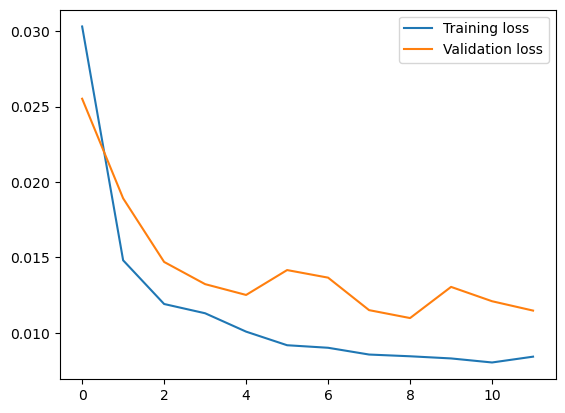

In [461]:
history = model.fit(trainX, trainY, epochs=12, batch_size=64, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [462]:
prediction = model.predict(testX[100:101]) 
prediction

1/1 [==============================] - 0s 242ms/step


array([[0.5902823]], dtype=float32)

In [463]:
testY[100]

array([0.66666667])

### Sacar métricas de lo que falla. Con el unique, ver a cual se acerca más. Sacar matrix_confusion, con este modelo.

### Ahora vamos a sacar todas las Y^ y todas las y.

In [464]:
y_real = testY.tolist()

In [465]:
"""
y_pred = []
for i in range (0, len(y_real)):
    prediction = model.predict(testX[i:i+1])     
    valor = prediction[0][0].item()
    y_pred.append(valor)
"""

'\ny_pred = []\nfor i in range (0, len(y_real)):\n    prediction = model.predict(testX[i:i+1])     \n    valor = prediction[0][0].item()\n    y_pred.append(valor)\n'

In [467]:
#Predecimos con los datos de entrenamiento, solo queremos sacar los puntos
predictions = model.predict(testX)


34/34 [==============================] - 0s 11ms/step


In [391]:
clases = np.unique(trainY[:,0])
clases

array([0.        , 0.33333333, 0.66666667, 1.        ])

### Vamos a sacar los puntos que mejor separan las clases, y para ello vamos a usar una regresion logistica

In [180]:
puntos = []

In [398]:
from sklearn.linear_model import LogisticRegression
##Este calcula el punto entre la clase 2 y la 3
index0 = np.logical_or(trainY[:,0] == clases[0],trainY[:,0] == clases[1] )
index1 = np.logical_or(trainY[:,0] == clases[2],trainY[:,0] == clases[3] )
trainY[index0] = 0
trainY[index1] = 1

predictions = np.squeeze(predictions)
predictions = predictions.reshape(-1,1)
predictions.shape

trainY = np.squeeze(trainY)
trainY = trainY.reshape(-1,1)
trainY.shape

rl = LogisticRegression(random_state=0).fit(predictions, trainY)
punto = -rl.intercept_/rl.coef_
print(punto)
puntos.append(punto)

[[0.50432424]]


/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [401]:
##Este calcula el punto entre la clase 1 y la 2
index0 = trainY[:,0] == clases[0]
index1 = np.logical_or(trainY[:,0] == clases[1],trainY[:,0] == clases[2], trainY[:,0] == clases[3])
trainY[index0] = 1
trainY[index1] = 0

predictions = np.squeeze(predictions)
predictions = predictions.reshape(-1,1)
predictions.shape

trainY = np.squeeze(trainY)
trainY = trainY.reshape(-1,1)
trainY.shape

rl = LogisticRegression(random_state=0).fit(predictions, trainY)
punto = -rl.intercept_/rl.coef_
print(punto)


[[0.18204395]]


/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [419]:
clases[3]

1.0

In [430]:
index0 = trainY[:,0] != clases[3]
index1 = trainY[:,0] == clases[3]
trainY[index0] = 0
trainY[index1] = 1

predictions = np.squeeze(predictions)
predictions = predictions.reshape(-1,1)

trainY = np.squeeze(trainY)
trainY = trainY.reshape(-1,1)

rl = LogisticRegression(random_state=0).fit(predictions, trainY)
punto = -rl.intercept_/rl.coef_
print(punto)


[[1.52959326]]


/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [468]:
puntos = [0.18204395,0.50432424, 0.67542743]

In [469]:
y_pred_2 = predictions[:,0].tolist()

In [470]:
all([round(x,4) == round(y,4) for x, y in zip(y_pred, y_pred_2)])

False

In [471]:
y_pred = y_pred_2

In [472]:
print(len(y_real), len(y_pred))

1064 1064


In [473]:
uniques = set(tuple(x) for x in y_real)
uniques = [list(x) for x in uniques]

In [474]:
uniques

[[0.0], [1.0], [0.6666666666666667], [0.3333333333333333]]

In [530]:
#Esto es cogiendo el punto medio entre las dos clases
y_pred_normalized = []
for val in y_pred:
    if (val<puntos[0]):
        y_pred_normalized.append(uniques[0][0])
    if (val>=puntos[0] and val<puntos[1]):
        y_pred_normalized.append(uniques[3][0])
    if (val>=puntos[1] and val<puntos[2]):
        y_pred_normalized.append(uniques[3][0])
    if (val>=puntos[2]):
        y_pred_normalized.append(uniques[2][0])


In [527]:
#Esto es cogiendo el punto predicho con la regresion lineal entre las dos clases
y_pred_normalized = []
for val in y_pred:
    dist = [abs(val-x[0]) if x[0] != 1 else abs(val-0.67) for x in uniques]
    closest_val = uniques[np.argmin(dist)][0]
    y_pred_normalized.append(closest_val)


In [531]:
bien_predecidas = 0
mal_predecidas = 0

for i in range (0, len(y_real)):
    if y_pred_normalized[i] == y_real[i][0]:
        bien_predecidas += 1
    else:
        mal_predecidas += 1

precision = bien_predecidas/(mal_predecidas+bien_predecidas)      

In [532]:
print("El modelo tiene una precision de: ", precision)

El modelo tiene una precision de:  0.4257518796992481


### Ahora tenemos que sacar las demás métricas y como tenemos 4 clases

### El número de stint que más veces aparece en el conjunto de test, ¿qué porcentaje sobre el total supone? 

In [102]:
frecuencias = {}

y_real_ = [sublista[0] for sublista in y_real]
frecuencias = {}
numero_mas_frecuente = None
frecuencia_maxima = 0

for numero in y_real_:
    if numero in frecuencias:
        frecuencias[numero] += 1
    else:
        frecuencias[numero] = 1

    if frecuencias[numero] > frecuencia_maxima:
        frecuencia_maxima = frecuencias[numero]
        numero_mas_frecuente = numero

print("El número que aparece con más frecuencia es:", numero_mas_frecuente)
print("Las frecuencias de cada número son:")
total = len(y_real_)

for numero, frecuencia in frecuencias.items():
    print(numero, "aparece", frecuencia, "veces que supone un", round((frecuencia/total)*100, 2), "del total")
    

El número que aparece con más frecuencia es: 0.6666666666666667
Las frecuencias de cada número son:
0.3333333333333333 aparece 11 veces que supone un 20.37 del total
0.6666666666666667 aparece 26 veces que supone un 48.15 del total
1.0 aparece 17 veces que supone un 31.48 del total


In [103]:
clases = [str(sublista[0]) for sublista in uniques]
#Tenemos las clases en tipo string
clases

['0.6666666666666667', '1.0', '0.3333333333333333']

### Ahora tenemos la lista clases, que son nuestras 4 clases para clasificar. Asi que vamos a pasar las clases a string, y vamos a sacar FN, FP, TP, TN

In [104]:
y_real_str = [str(sublista) for sublista in y_real_]
y_pred_normalized_str = [str(sublista) for sublista in y_pred_normalized]

In [105]:
from sklearn.metrics import confusion_matrix, classification_report
# Calcular la matriz de confusión
cm = confusion_matrix(y_real_str, y_pred_normalized_str, labels=clases)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(clases)
print(cm)

# Imprimir las métricas básicas
print("Métricas:")
print(classification_report(y_real_str, y_pred_normalized_str, labels=clases))

Matriz de confusión:
['0.6666666666666667', '1.0', '0.3333333333333333']
[[25  0  1]
 [ 1 16  0]
 [ 0  0 11]]
Métricas:
                    precision    recall  f1-score   support

0.6666666666666667       0.96      0.96      0.96        26
               1.0       1.00      0.94      0.97        17
0.3333333333333333       0.92      1.00      0.96        11

          accuracy                           0.96        54
         macro avg       0.96      0.97      0.96        54
      weighted avg       0.96      0.96      0.96        54



### Cuidado, ¿puede haber desbalanceo de clases?